In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import cPickle as pickle

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

#### Clean before model

In [4]:
df = pd.read_pickle('df_1to7499_features.pkl')

In [5]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3,3,93,530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269,1,0,1,1,1
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,5,0,1,1,1


In [6]:
df.tail(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
4755,7499,225583,NE 130TH ST BETWEEN LAKE CITY WAY NE AND 33RD ...,NE 130TH ST BETWEEN LAKE CITY WAY NE AND 33RD ...,2013-10-01 07:00:00,2013-10-01 07:00:00,2013-10-02 07:00:00,1 days,1,47.744614,-122.294066,"33rd Ave NE, Seattle, WA, USA",9.724967,8.952767,9.586114,9.369915,5.944939,7.978499,4,-4,10,,530330214002,1500000US530330214002,"Block Group 2, Census Tract 214, King County, ...",428400,54553,1,0,1,1,1
4756,7500,210335,EB bike lane between 14th and 16th Ave ...,E UNION ST BETWEEN 15TH AVE AND 16TH AVE ...,2013-07-10 07:00:00,2013-07-12 07:00:00,2013-07-12 07:00:00,2 days,2,47.610378,-122.311513,"16th Ave, Seattle, WA 98122, USA",1.002700,1.897800,1.434032,0.944730,4.473846,2.862636,3,-1,7,55,530330079003,1500000US530330079003,"Block Group 3, Census Tract 79, King County, W...",245000,35437,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4757 non-null int64
WOKEY                     4757 non-null int64
LOCATION                  4757 non-null object
ADDRDESC                  4757 non-null object
INITDT_dt                 4757 non-null datetime64[ns]
FLDSTARTDT_dt             4757 non-null datetime64[ns]
FLDENDDT_dt               4757 non-null datetime64[ns]
DURATION                  4757 non-null timedelta64[ns]
DURATION_td               4757 non-null float64
latitude                  4757 non-null float64
longitude                 4757 non-null float64
address                   4757 non-null object
Seattle_dist              4757 non-null float64
Space_Needle_dist         4757 non-null float64
Pike_Place_dist           4757 non-null float64
Convention_Center_dist    4757 non-null float64
Woodland_Park_dist        4757 non-null float64
Queene_Anne_dist          4757 non-null float64
INIT_Qu

In [138]:
type(df.ix[0,'neighborhood_label'])

numpy.int64

####Remember:  No. of potholes could be more predictive of repair time, so I DO need to include this as a predictor.

In [8]:
df[df['neighborhood_label'] == ''].shape

(172, 32)

In [9]:
df = df[df['neighborhood_label'] != '']

In [10]:
np.any(df.neighborhood_label == '')

False

In [11]:
sum(df.DURATION_td == 0.0)

4

In [12]:
df[df.DURATION_td == 0.0]

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
295,448,338004,Shallow Pothole ...,15TH AVE E BETWEEN E GALER ST AND E GARFIELD S...,2015-03-08 08:00:00,2015-03-09 07:00:00,2015-03-09 07:00:00,23:00:00,0,47.632692,-122.299830,"E Garfield St, Seattle, WA, USA",2.369669,2.458049,2.536548,2.092643,3.527669,2.731130,1,3,3,98,530330062001,1500000US530330062001,"Block Group 1, Census Tract 62, King County, W...",721400,61113,1,0,1,1,1
2718,4256,190832,"698 W MERCER PL, SEATTLE, WA 98119 ...",W MERCER PL BETWEEN 6TH AVE W AND ELLIOTT AVE ...,2013-03-10 08:00:00,2013-03-11 07:00:00,2013-03-11 07:00:00,23:00:00,0,47.625639,-122.367027,"Elliott Ave W, Seattle, WA 98119, USA",2.113811,0.901674,1.598502,1.922310,3.028934,0.922038,1,3,3,45,530330071001,1500000US530330071001,"Block Group 1, Census Tract 71, King County, W...",367000,57656,1,0,1,1,1
4367,6922,338017,Rainier Ave S south of Thistle SB on street ne...,RAINIER AVE S BETWEEN S THISTLE ST AND S CLOVE...,2015-03-08 08:00:00,2015-03-09 07:00:00,2015-03-09 07:00:00,23:00:00,0,47.526137,-122.289320,"S Cloverdale St, Seattle, WA, USA",5.881881,7.096565,6.281264,6.213722,10.286892,8.332554,1,3,3,81,530330117002,1500000US530330117002,"Block Group 2, Census Tract 117, King County, ...",296300,34980,NaN,NaN,NaN,NaN,NaN
4375,6933,338001,Pothole in front of group health between 15th ...,E THOMAS ST BETWEEN 15TH (S LEG) AVE E AND 16T...,2015-03-08 08:00:00,2015-03-09 07:00:00,2015-03-09 07:00:00,23:00:00,0,47.630397,-122.311242,"16th Ave E, Seattle, WA 98112, USA",1.933600,1.903295,2.032375,1.623486,3.295791,2.232374,1,3,3,101,530330064002,1500000US530330064002,"Block Group 2, Census Tract 64, King County, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[df.DURATION_td != 0.0].shape

(4581, 32)

In [14]:
df.shape

(4585, 32)

In [15]:
df = df[df.DURATION_td != 0.0]

In [16]:
df.shape

(4581, 32)

In [17]:
df[pd.isnull(df.Median_Value)].shape

(285, 32)

In [18]:
df[pd.isnull(df.Margin_of_Error)].shape

(285, 32)

In [19]:
df[pd.isnull(df.Margin_of_Error)].shape[0]/float(df.shape[0])

0.06221349050425671

####6% of Median Value are NaN.  285/4581.  Ignore and remove for now.

In [20]:
df = df[np.isfinite(df['Median_Value'])]

In [21]:
df.shape

(4296, 32)

####Now it's time to deal with the street features.  I also want to use this notebook to develop some EDA of the duration variable for tomorrow.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4296 non-null int64
WOKEY                     4296 non-null int64
LOCATION                  4296 non-null object
ADDRDESC                  4296 non-null object
INITDT_dt                 4296 non-null datetime64[ns]
FLDSTARTDT_dt             4296 non-null datetime64[ns]
FLDENDDT_dt               4296 non-null datetime64[ns]
DURATION                  4296 non-null timedelta64[ns]
DURATION_td               4296 non-null float64
latitude                  4296 non-null float64
longitude                 4296 non-null float64
address                   4296 non-null object
Seattle_dist              4296 non-null float64
Space_Needle_dist         4296 non-null float64
Pike_Place_dist           4296 non-null float64
Convention_Center_dist    4296 non-null float64
Woodland_Park_dist        4296 non-null float64
Queene_Anne_dist          4296 non-null float64
INIT_Qu

In [23]:
df[pd.isnull(df.SND_FEACOD)].shape[0]/float(df.shape[0])

0.36033519553072624

####36% !!

In [25]:
df.SND_FEACOD = df.SND_FEACOD.fillna('NO SND_FEACOD')
df.ST_CODE = df.ST_CODE.fillna('NO ST_CODE')
df.SEGMENT_TY = df.SEGMENT_TY.fillna('NO SEGMENT_TY')
df.DIVIDED_CO = df.DIVIDED_CO.fillna('NO DIVIDED_CO')
df.VEHICLE_US = df.VEHICLE_US.fillna('NO VEHICLE_US')

In [26]:
df.SND_FEACOD.value_counts()

1.0              1749
NO SND_FEACOD    1548
5.0               940
77.0               31
0.0                17
13.0                7
85.0                3
9.0                 1
dtype: int64

####Interesting that they are floats.  Should be cast as ints.

In [27]:
df.ST_CODE.value_counts()

0.0           2607
NO ST_CODE    1548
40.0            45
1.0             22
2.0             21
22.0            17
21.0             7
20.0             7
8.0              7
4.0              7
50.0             3
7.0              3
6.0              2
dtype: int64

In [28]:
df.SEGMENT_TY.value_counts()

1.0              2703
NO SEGMENT_TY    1548
8.0                17
7.0                 7
6.0                 7
4.0                 7
9.0                 2
5.0                 2
2.0                 2
13.0                1
dtype: int64

In [29]:
df.DIVIDED_CO.value_counts()

1.0              2719
NO DIVIDED_CO    1548
2.0                14
6.0                 7
4.0                 6
5.0                 2
dtype: int64

In [30]:
df.VEHICLE_US.value_counts()

1.0              2717
NO VEHICLE_US    1548
2.0                24
3.0                 7
dtype: int64

In [31]:
df.isnull().values.any()

False

####No NaNs left.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4296 non-null int64
WOKEY                     4296 non-null int64
LOCATION                  4296 non-null object
ADDRDESC                  4296 non-null object
INITDT_dt                 4296 non-null datetime64[ns]
FLDSTARTDT_dt             4296 non-null datetime64[ns]
FLDENDDT_dt               4296 non-null datetime64[ns]
DURATION                  4296 non-null timedelta64[ns]
DURATION_td               4296 non-null float64
latitude                  4296 non-null float64
longitude                 4296 non-null float64
address                   4296 non-null object
Seattle_dist              4296 non-null float64
Space_Needle_dist         4296 non-null float64
Pike_Place_dist           4296 non-null float64
Convention_Center_dist    4296 non-null float64
Woodland_Park_dist        4296 non-null float64
Queene_Anne_dist          4296 non-null float64
INIT_Qu

In [33]:
df.SND_FEACOD = df.SND_FEACOD.astype('category')
df.ST_CODE = df.ST_CODE.astype('category')
df.SEGMENT_TY = df.SEGMENT_TY.astype('category')
df.DIVIDED_CO = df.DIVIDED_CO.astype('category')
df.VEHICLE_US = df.VEHICLE_US.astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4296 non-null int64
WOKEY                     4296 non-null int64
LOCATION                  4296 non-null object
ADDRDESC                  4296 non-null object
INITDT_dt                 4296 non-null datetime64[ns]
FLDSTARTDT_dt             4296 non-null datetime64[ns]
FLDENDDT_dt               4296 non-null datetime64[ns]
DURATION                  4296 non-null timedelta64[ns]
DURATION_td               4296 non-null float64
latitude                  4296 non-null float64
longitude                 4296 non-null float64
address                   4296 non-null object
Seattle_dist              4296 non-null float64
Space_Needle_dist         4296 non-null float64
Pike_Place_dist           4296 non-null float64
Convention_Center_dist    4296 non-null float64
Woodland_Park_dist        4296 non-null float64
Queene_Anne_dist          4296 non-null float64
INIT_Qu

In [35]:
df.neighborhood_label = df.neighborhood_label.astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4296 non-null int64
WOKEY                     4296 non-null int64
LOCATION                  4296 non-null object
ADDRDESC                  4296 non-null object
INITDT_dt                 4296 non-null datetime64[ns]
FLDSTARTDT_dt             4296 non-null datetime64[ns]
FLDENDDT_dt               4296 non-null datetime64[ns]
DURATION                  4296 non-null timedelta64[ns]
DURATION_td               4296 non-null float64
latitude                  4296 non-null float64
longitude                 4296 non-null float64
address                   4296 non-null object
Seattle_dist              4296 non-null float64
Space_Needle_dist         4296 non-null float64
Pike_Place_dist           4296 non-null float64
Convention_Center_dist    4296 non-null float64
Woodland_Park_dist        4296 non-null float64
Queene_Anne_dist          4296 non-null float64
INIT_Qu

####Number of potholes could be more predictive of repair time.  Need to compute this.

In [42]:
df.groupby('INITDT_dt')['OBJECTID'].count()

INITDT_dt
2010-03-15 07:00:00    2
2010-03-16 07:00:00    2
2010-03-19 07:00:00    1
2010-03-22 07:00:00    3
2010-03-24 07:00:00    5
2010-03-26 07:00:00    2
2010-03-27 07:00:00    2
2010-03-29 07:00:00    2
2010-03-30 07:00:00    1
2010-03-31 07:00:00    1
2010-04-02 07:00:00    1
2010-04-05 07:00:00    1
2010-04-06 07:00:00    2
2010-04-08 07:00:00    2
2010-04-12 07:00:00    5
2010-04-14 07:00:00    1
2010-04-15 07:00:00    1
2010-04-16 07:00:00    1
2010-04-17 07:00:00    1
2010-04-19 07:00:00    7
2010-04-20 07:00:00    2
2010-04-21 07:00:00    2
2010-04-22 07:00:00    3
2010-04-23 07:00:00    2
2010-04-26 07:00:00    4
2010-04-27 07:00:00    3
2010-04-28 07:00:00    2
2010-04-29 07:00:00    2
2010-04-30 07:00:00    2
2010-05-03 07:00:00    3
                      ..
2015-07-18 07:00:00    1
2015-07-20 07:00:00    1
2015-07-21 07:00:00    1
2015-07-22 07:00:00    1
2015-07-23 07:00:00    1
2015-07-24 07:00:00    4
2015-07-27 07:00:00    2
2015-07-28 07:00:00    1
2015-07-29 07:0

In [46]:
df_number_potholes = pd.DataFrame(df.groupby('INITDT_dt')['OBJECTID'].count()).reset_index()

In [47]:
df_number_potholes.head(2)

,INITDT_dt,OBJECTID
0,2010-03-15 07:00:00,2
1,2010-03-16 07:00:00,2


In [48]:
df_number_potholes.rename(columns={'OBJECTID': 'Number_potholes'}, inplace=True)

In [49]:
df_number_potholes.head()

,INITDT_dt,Number_potholes
0,2010-03-15 07:00:00,2
1,2010-03-16 07:00:00,2
2,2010-03-19 07:00:00,1
3,2010-03-22 07:00:00,3
4,2010-03-24 07:00:00,5


In [50]:
df_number_potholes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1387
Data columns (total 2 columns):
INITDT_dt          1388 non-null datetime64[ns]
Number_potholes    1388 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.5 KB


In [52]:
df = pd.merge(df, df_number_potholes, how='left', on='INITDT_dt')

I can do this with a join on a date column

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4295
Data columns (total 33 columns):
OBJECTID                  4296 non-null int64
WOKEY                     4296 non-null int64
LOCATION                  4296 non-null object
ADDRDESC                  4296 non-null object
INITDT_dt                 4296 non-null datetime64[ns]
FLDSTARTDT_dt             4296 non-null datetime64[ns]
FLDENDDT_dt               4296 non-null datetime64[ns]
DURATION                  4296 non-null timedelta64[ns]
DURATION_td               4296 non-null float64
latitude                  4296 non-null float64
longitude                 4296 non-null float64
address                   4296 non-null object
Seattle_dist              4296 non-null float64
Space_Needle_dist         4296 non-null float64
Pike_Place_dist           4296 non-null float64
Convention_Center_dist    4296 non-null float64
Woodland_Park_dist        4296 non-null float64
Queene_Anne_dist          4296 non-null float64
INIT_Qu

####OK, now we want to produce a histogram of duration that I can use in presentation tomorrow

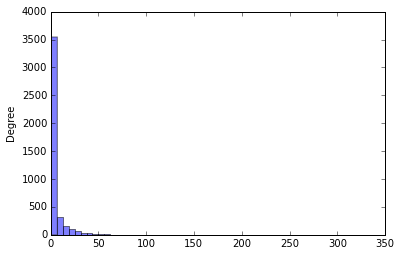

In [54]:
df.DURATION_td.plot(kind='hist', alpha=0.5, bins=50)

In [56]:
type(df.DURATION.value_counts())

pandas.core.series.Series

In [57]:
len(df.DURATION.value_counts())

100

In [59]:
df.DURATION.value_counts().shape[0]

100L

In [61]:
df.DURATION.value_counts().describe()

count     100.000000
mean       42.960000
std       160.328887
min         1.000000
25%         1.000000
50%         4.000000
75%        13.000000
max      1344.000000
dtype: float64

In [63]:
df.DURATION.value_counts().index

TimedeltaIndex([  '1 days 00:00:00',   '2 days 00:00:00',   '3 days 00:00:00',
                  '4 days 00:00:00',   '5 days 00:00:00',   '6 days 00:00:00',
                  '7 days 00:00:00',   '8 days 00:00:00',   '9 days 00:00:00',
                 '10 days 00:00:00',  '11 days 00:00:00',  '13 days 00:00:00',
                 '12 days 00:00:00',  '14 days 00:00:00',  '17 days 00:00:00',
                 '16 days 00:00:00',  '20 days 00:00:00',  '15 days 00:00:00',
                 '21 days 00:00:00',  '18 days 00:00:00',  '19 days 00:00:00',
                 '22 days 00:00:00',  '23 days 00:00:00',  '32 days 00:00:00',
                 '26 days 00:00:00',  '28 days 00:00:00',   '2 days 23:00:00',
                 '30 days 00:00:00',  '27 days 00:00:00',  '24 days 00:00:00',
                 '31 days 00:00:00',   '3 days 23:00:00',  '29 days 00:00:00',
                 '25 days 00:00:00',  '36 days 00:00:00',   '5 days 23:00:00',
                 '38 days 00:00:00',  '45 days 00:00

In [77]:
df.DURATION.value_counts().index.max()

Timedelta('307 days 00:00:00')

In [79]:
df.DURATION.value_counts().index.order()

TimedeltaIndex([  '1 days 00:00:00',   '1 days 23:00:00',   '2 days 00:00:00',
                  '2 days 23:00:00',   '3 days 00:00:00',   '3 days 01:00:00',
                  '3 days 23:00:00',   '4 days 00:00:00',   '4 days 01:00:00',
                  '4 days 23:00:00',   '5 days 00:00:00',   '5 days 01:00:00',
                  '5 days 23:00:00',   '6 days 00:00:00',   '6 days 01:00:00',
                  '6 days 23:00:00',   '7 days 00:00:00',   '7 days 01:00:00',
                  '8 days 00:00:00',   '9 days 00:00:00',   '9 days 23:00:00',
                 '10 days 00:00:00',  '10 days 01:00:00',  '10 days 23:00:00',
                 '11 days 00:00:00',  '11 days 23:00:00',  '12 days 00:00:00',
                 '12 days 23:00:00',  '13 days 00:00:00',  '13 days 01:00:00',
                 '14 days 00:00:00',  '14 days 23:00:00',  '15 days 00:00:00',
                 '16 days 00:00:00',  '17 days 00:00:00',  '17 days 01:00:00',
                 '18 days 00:00:00',  '19 days 00:00

1. Very outlier heavy data.  How many do I remove?  What is the impact of different removal thresholds?  Compute some percentiles and cut off the top 5%.
2. Real data.

In [80]:
df.DURATION.describe()

count                       4296
mean      5 days 21:11:27.150837
std      10 days 00:54:19.206920
min              1 days 00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%              6 days 00:00:00
max            307 days 00:00:00
Name: DURATION, dtype: object

In [81]:
df.DURATION_td.describe()

count    4296.000000
mean        5.868482
std        10.023752
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       307.000000
Name: DURATION_td, dtype: float64

In [83]:
df.DURATION_td.quantile(0.95), df.DURATION.quantile(0.95)

(23.0, Timedelta('23 days 00:00:00'))

In [84]:
df.DURATION_td.quantile(0.99), df.DURATION.quantile(0.99)

(49.0, Timedelta('49 days 00:00:00'))

Predict several target variables because of the extreme skewness of the data:
1. 95% quantile and below
2. Interquartile (25% - 75%)
3. all the data
4. Short 
5. Long repairs 
6. classification of short vs. long

In [89]:
df['b_DURATION_td_95'] = df.DURATION_td < df.DURATION_td.quantile(.95)

In [95]:
df['b_DURATION_td_IQuart'] = (df.DURATION_td < df.DURATION_td.quantile(.75)) & (df.DURATION_td > df.DURATION_td.quantile(.25))

In [85]:
df.DURATION_td.quantile(0.999), df.DURATION.quantile(0.999)

(80.345000000007531, Timedelta('81 days 00:29:42.000000'))

In [67]:
df[df.DURATION > '3 days'].shape

(1856, 33)

In [68]:
df[df.DURATION < '3 days'].shape

(1950, 33)

In [69]:
df.shape

(4296, 33)

In [70]:
1856+1950

3806

In [71]:
df[df.DURATION_td > 3].shape

(1845, 33)

In [72]:
df[df.DURATION_td <= 3].shape

(2451, 33)

In [73]:
df[df.DURATION <= '3 days'].shape

(2440, 33)

In [74]:
df['b_long_repair'] = df.DURATION_td > 3

In [75]:
df.b_long_repair.value_counts()

False    2451
True     1845
dtype: int64

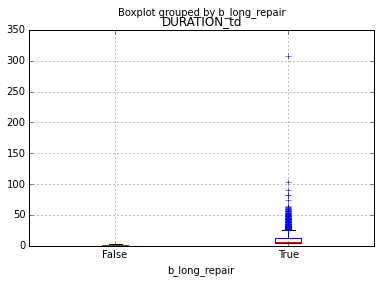

In [76]:
df.boxplot('DURATION_td', by = 'b_long_repair')

####Permanently get rid of the values above the 95% percentile

In [114]:
df = df[df.DURATION_td < df.DURATION_td.quantile(.95)]

In [116]:
df.shape

(4074, 36)

In [115]:
df.groupby('b_long_repair')['DURATION_td'].describe()

b_long_repair       
False          count    2451.000000
               mean        1.654019
               std         0.797089
               min         1.000000
               25%         1.000000
               50%         1.000000
               75%         2.000000
               max         3.000000
True           count    1623.000000
               mean        7.770179
               std         4.546192
               min         4.000000
               25%         5.000000
               50%         6.000000
               75%         9.000000
               max        22.000000
dtype: float64

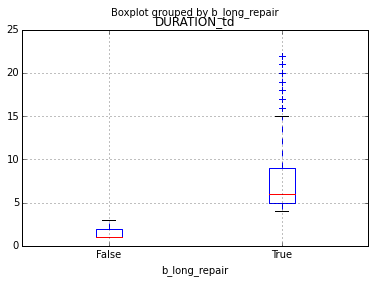

In [117]:
df.boxplot('DURATION_td', by = 'b_long_repair')

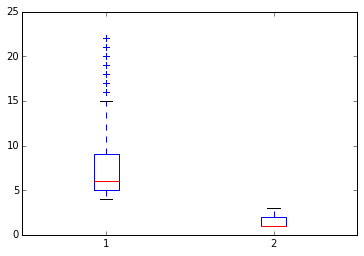

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot([df['DURATION_td'][df['b_long_repair'] == True], df['DURATION_td'][df['b_long_repair'] == False]])
plt.savefig('bar_long_repair.png')

In [118]:
df.groupby('b_long_repair').describe().T

b_long_repair          False                                                  \
                       count                    mean                     std   
Convention_Center_dist  2451                4.082763                2.259029   
DURATION                2451  1 days 15:55:56.181150  0 days 19:24:25.397507   
DURATION_td             2451                1.654019               0.7970886   
INIT_Quarter            2451                2.099959                1.137579   
INIT_month              2451                5.312118                3.543101   
Margin_of_Error         2451                71709.56                 67251.3   
Median_Value            2451                422868.7                151042.7   
Number_potholes         2451                5.082415                4.482499   
OBJECTID                2451                3714.835                2228.891   
Pike_Place_dist         2451                4.161072                2.203337   
Queene_Anne_dist        2451                4.329218                2.075875   
Seattle_dist            2451                4.147149                2.313797   
Space_Needle_dist       2451                4.159927                2.067156   
WOKEY                   2451                  202370                  108304   
Woodland_Park_dist      2451                 4.87295                2.702797   
b_DURATION_td_95        2451                       1                       0   
b_DURATION_td_IQuart    2451               0.4496124               0.4975561   
days_end_FY             2451               0.6878825                3.543101   
latitude                2451                47.62462              0.06190514   
longitude               2451               -122.3332              0.03482849   
neighborhood_label      2451                78.17544                26.11565   

b_long_repair                                                              \
                                    min              25%              50%   
Convention_Center_dist       0.05907421         1.984571         4.180978   
DURATION                1 days 00:00:00  1 days 00:00:00  1 days 00:00:00   
DURATION_td                           1                1                1   
INIT_Quarter                          1                1                2   
INIT_month                            1                3                4   
Margin_of_Error                    7920            32637            50586   
Median_Value                     162800           327700           378400   
Number_potholes                       1                2                4   
OBJECTID                              3           1742.5             3772   
Pike_Place_dist               0.1344163         2.316505         4.089365   
Queene_Anne_dist              0.1769855         2.632563         4.278025   
Seattle_dist                  0.1331334         2.135162         4.093667   
Space_Needle_dist            0.07832898         2.341944         4.240454   
WOKEY                              1591         101472.5           198283   
Woodland_Park_dist            0.1887608         2.846609         4.081696   
b_DURATION_td_95                   True                1                1   
b_DURATION_td_IQuart              False                0                0   
days_end_FY                          -6               -2                2   
latitude                       47.49939         47.57027         47.62286   
longitude                     -122.4181        -122.3647        -122.3289   
neighborhood_label                   27               57               80   

b_long_repair                                            True   \
                                    75%              max count   
Convention_Center_dist          5.87906         8.584342  1623   
DURATION                2 days 00:00:00  3 days 23:00:00  1623   
DURATION_td                           2                3  1623   
INIT_Quarter                          3                4 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 4295
Data columns (total 36 columns):
OBJECTID                  4074 non-null int64
WOKEY                     4074 non-null int64
LOCATION                  4074 non-null object
ADDRDESC                  4074 non-null object
INITDT_dt                 4074 non-null datetime64[ns]
FLDSTARTDT_dt             4074 non-null datetime64[ns]
FLDENDDT_dt               4074 non-null datetime64[ns]
DURATION                  4074 non-null timedelta64[ns]
DURATION_td               4074 non-null float64
latitude                  4074 non-null float64
longitude                 4074 non-null float64
address                   4074 non-null object
Seattle_dist              4074 non-null float64
Space_Needle_dist         4074 non-null float64
Pike_Place_dist           4074 non-null float64
Convention_Center_dist    4074 non-null float64
Woodland_Park_dist        4074 non-null float64
Queene_Anne_dist          4074 non-null float64
INIT_Qu

####I'm going to have to scale the predictors; the magnitudes/differences have different meanings.

1. Scatterplot of number of potholes vs. time to repair
2. double histogram of long vs. short repair times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000186C86D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019DF4978>], dtype=object)

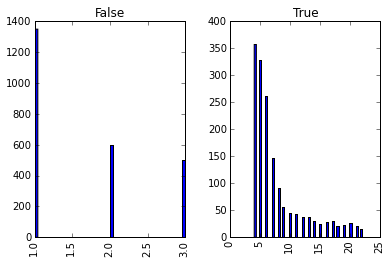

In [121]:
df.DURATION_td.hist(bins=50, histtype='bar', by=df.b_long_repair, stacked=True) 

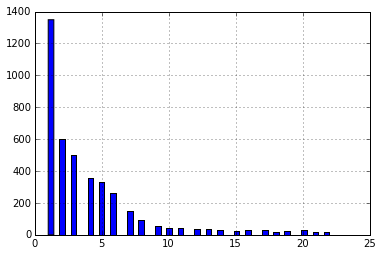

In [122]:
df.DURATION_td.hist(bins=50)

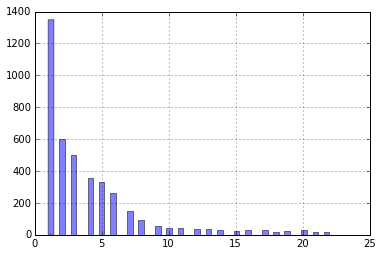

In [124]:
df.DURATION_td.hist(bins=50, alpha=0.5)

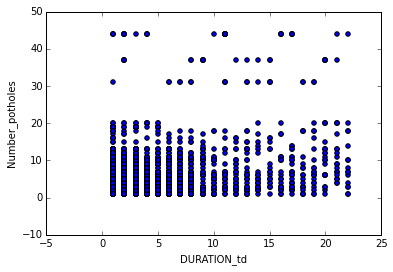

In [125]:
df.plot(kind='scatter', x='DURATION_td', y='Number_potholes');

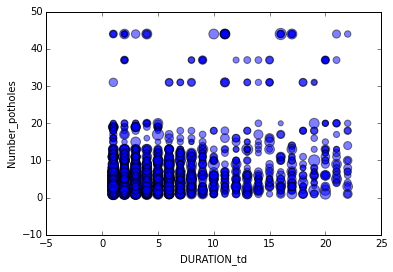

In [136]:
df.plot(kind='scatter', x='DURATION_td', y='Number_potholes', alpha=0.5, s=0.0001*df['Median_Value']**1.02);

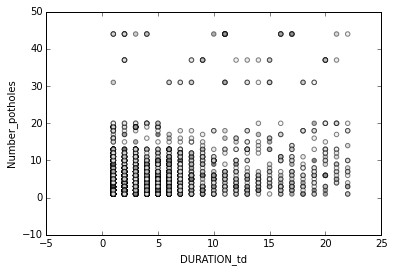

In [137]:
df.plot(kind='scatter', x='DURATION_td', y='Number_potholes', alpha=0.5, c=0.0001*df['Median_Value']**1.02);

####OK, let's move toward modeling

In [145]:
df['long_repair'] = df['b_long_repair'].apply(lambda x: 1 if x == True else 0) 

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 4295
Data columns (total 37 columns):
OBJECTID                  4074 non-null int64
WOKEY                     4074 non-null int64
LOCATION                  4074 non-null object
ADDRDESC                  4074 non-null object
INITDT_dt                 4074 non-null datetime64[ns]
FLDSTARTDT_dt             4074 non-null datetime64[ns]
FLDENDDT_dt               4074 non-null datetime64[ns]
DURATION                  4074 non-null timedelta64[ns]
DURATION_td               4074 non-null float64
latitude                  4074 non-null float64
longitude                 4074 non-null float64
address                   4074 non-null object
Seattle_dist              4074 non-null float64
Space_Needle_dist         4074 non-null float64
Pike_Place_dist           4074 non-null float64
Convention_Center_dist    4074 non-null float64
Woodland_Park_dist        4074 non-null float64
Queene_Anne_dist          4074 non-null float64
INIT_Qu

I've got to do my dummies.

In [ ]:
df_dum_neighborhood_label = pd.get_dummies(df.neighborhood_label)

In [149]:
df_dum_INIT_Quarter = pd.get_dummies(df.INIT_Quarter)
df_dum_SND_FEACOD = pd.get_dummies(df.SND_FEACOD)
df_dum_ST_CODE = pd.get_dummies(df.ST_CODE)
df_dum_SEGMENT_TY = pd.get_dummies(df.SEGMENT_TY)
df_dum_DIVIDED_CO = pd.get_dummies(df.DIVIDED_CO)
df_dum_VEHICLE_US = pd.get_dummies(df.VEHICLE_US)

####OK, make complete dataframe

In [152]:
df_all = pd.concat([df.ix[:, ['Queene_Anne_dist','Woodland_Park_dist','DURATION_td',
        'b_DURATION_td_IQuart','b_long_repair','long_repair', 
        'Space_Needle_dist','Convention_Center_dist','Pike_Place_dist','Number_potholes',
        'Seattle_dist','latitude','longitude','Median_Value','Margin_of_Error','days_end_FY',]],
        df_dum_neighborhood_label, df_dum_INIT_Quarter, df_dum_ST_CODE, df_dum_SEGMENT_TY,
        df_dum_DIVIDED_CO, df_dum_VEHICLE_US, df_dum_SND_FEACOD], axis=1)

In [153]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 4295
Columns: 150 entries, Queene_Anne_dist to NO SND_FEACOD
dtypes: bool(2), float64(145), int64(3)
memory usage: 4.6 MB


In [154]:
df_data = pd.concat([df.ix[:, ['Queene_Anne_dist','Woodland_Park_dist',
        'Space_Needle_dist','Convention_Center_dist','Pike_Place_dist','Number_potholes',
        'Seattle_dist','latitude','longitude','Median_Value','Margin_of_Error','days_end_FY',]],
        df_dum_neighborhood_label, df_dum_INIT_Quarter, df_dum_ST_CODE, df_dum_SEGMENT_TY,
        df_dum_DIVIDED_CO, df_dum_VEHICLE_US, df_dum_SND_FEACOD], axis=1)

In [155]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 0 to 4295
Columns: 146 entries, Queene_Anne_dist to NO SND_FEACOD
dtypes: float64(144), int64(2)
memory usage: 4.6 MB


####OK, continue to modeling

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
X = df_data
y = df['b_long_repair']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [160]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [161]:
lr.score(X_test,y_test)

0.5447852760736196

In [162]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, lr.predict(X_test))

0.52505243314773664

In [163]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, lr.predict(X_test)) #To understand this, I either read the documentation or create my own.

array([[305, 179],
       [192, 139]])

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8, subsample=0.5, 
                                 max_features='auto', learning_rate=0.05)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=8, max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [166]:
gbc.score(X_test,y_test)

0.5680981595092025

In [167]:
skm.roc_auc_score(y_test, gbc.predict(X_test)) #Notice the quick, convenient way to get y_predict on X_test

0.53799530598486933

In [168]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[338, 146],
       [206, 125]])

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1) #Wouldn't take the class_weight = 'auto' option)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
rfc.score(X_test, y_test)

0.58036809815950918

In [172]:
skm.roc_auc_score(y_test, rfc.predict(X_test))

0.54737085216349146

Tomorrow Morning:
1. Run RandomForest Regression
2. Run DecisionTree, see if you can get the tree plot
3. Do feature importances and plot
4. scale/normalize and rerun.
Tomorrow Afternoon:
1. Add precip, temp